In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV
from sklearn import ensemble
import scipy as sp
import sklearn as sk

In [2]:
#load train data and validation data
val = pd.read_csv("validation.csv")
#train = pd.read_csv("train.csv")
#train = pd.read_csv("file:///Users/chenbo/Desktop/UCL/WebEconomics/coursework/dataset/train.csv")
test =pd.read_csv("test.csv")

# data exploration

In [167]:
val.payprice

0         102
1         118
2          77
3          77
4         178
5          49
6          52
7          86
8         212
9          40
10         70
11        213
12         17
13        201
14         89
15         14
16        101
17         32
18         76
19        208
20         20
21         84
22        110
23         43
24         68
25         50
26         87
27         50
28         99
29         30
         ... 
299719      5
299720     55
299721     30
299722     51
299723     23
299724     90
299725     70
299726     34
299727     69
299728    182
299729     51
299730     80
299731     75
299732     73
299733     40
299734      6
299735    213
299736     60
299737      8
299738     21
299739     30
299740    158
299741     89
299742      4
299743    124
299744     25
299745      2
299746     22
299747     72
299748     12
Name: payprice, dtype: int64

In [40]:
def ctr_cal(dataset):
    imp=dataset.pivot_table(values='click',index='advertiser',aggfunc='count')
#final_co= x.pivot_table(values=['user_rating','stars_x'],index=['business_id','user_id'],aggfunc='mean')
    click=dataset.pivot_table(values='click',index='advertiser',aggfunc='sum')
    ctr=click/imp
    return ctr,click,imp



In [37]:
ctr_cal(val)

(advertiser
 1458    0.000833
 2259    0.000670
 2261    0.000374
 2821    0.000624
 2997    0.004309
 3358    0.000798
 3386    0.000598
 3427    0.000893
 3476    0.000335
 Name: click, dtype: float64, advertiser
 1458    50
 2259    11
 2261     5
 2821    16
 2997    26
 3358    27
 3386    33
 3427    45
 3476    13
 Name: click, dtype: int64, advertiser
 1458    60025
 2259    16419
 2261    13370
 2821    25632
 2997     6034
 3358    33853
 3386    55196
 3427    50381
 3476    38839
 Name: click, dtype: int64)

In [50]:
def cpm_cal(dataset):
    imp=dataset.pivot_table(values='click',index='advertiser',aggfunc='count')
    cost=dataset.pivot_table(values='payprice',index='advertiser',aggfunc='sum')
    cpm=cost/imp
    return cpm,cost

In [53]:
def cpc_cal(dataset):
    cost=dataset.pivot_table(values='payprice',index='advertiser',aggfunc='sum')
    click=dataset.pivot_table(values='click',index='advertiser',aggfunc='sum')
    return cost/click/1000


In [51]:
cpm_cal(val)

(advertiser
 1458    68.957684
 2259    92.554784
 2261    89.472625
 2821    89.007959
 2997    64.200199
 3358    92.335657
 3386    77.097362
 3427    80.931958
 3476    78.852519
 dtype: float64, advertiser
 1458    4139185
 2259    1519657
 2261    1196249
 2821    2281452
 2997     387384
 3358    3125839
 3386    4255466
 3427    4077433
 3476    3062553
 Name: payprice, dtype: int64)

In [42]:
ctr_cal(train)

(advertiser
 1458    0.000835
 2259    0.000307
 2261    0.000307
 2821    0.000622
 2997    0.004607
 3358    0.000764
 3386    0.000718
 3427    0.000749
 3476    0.000505
 Name: click, dtype: float64, advertiser
 1458    451
 2259     45
 2261     37
 2821    144
 2997    251
 3358    233
 3386    358
 3427    340
 3476    175
 Name: click, dtype: int64, advertiser
 1458    540293
 2259    146778
 2261    120619
 2821    231416
 2997     54487
 3358    304782
 3386    498554
 3427    454031
 3476    346778
 Name: click, dtype: int64)

In [52]:
cpm_cal(train)

(advertiser
 1458    68.909349
 2259    92.990952
 2261    89.448196
 2821    89.128522
 2997    62.642961
 3358    92.345637
 3386    76.904464
 3427    81.096029
 3476    79.247824
 dtype: float64, advertiser
 1458    37231239
 2259    13649026
 2261    10789152
 2821    20625766
 2997     3413227
 3358    28145288
 3386    38341028
 3427    36820111
 3476    27481402
 Name: payprice, dtype: int64)

In [54]:
cpc_cal(val)

advertiser
1458     82.783700
2259    138.150636
2261    239.249800
2821    142.590750
2997     14.899385
3358    115.771815
3386    128.953515
3427     90.609622
3476    235.581000
dtype: float64

In [55]:
cpc_cal(train)

advertiser
1458     82.552636
2259    303.311689
2261    291.598703
2821    143.234486
2997     13.598514
3358    120.795227
3386    107.097844
3427    108.294444
3476    157.036583
dtype: float64

# end

In [3]:
#用做index的栏
col = ['userid','useragent','IP','domain','url','slotid','slotwidth','slotheight','slotvisibility','slotformat','creative','keypage','usertag','adexchange']

train_in = train[col]
val_in = val[col]
test_in = test[col]

NameError: name 'train' is not defined

In [ ]:
len(train_in),len(val_in),len(test_in)

In [ ]:
combine = pd.concat([train_in,val_in,test_in])

In [ ]:
len(combine)

In [ ]:
def index_pre(a_list):
    userid_n = []
    userid_d = {}
    index = 1

    for user in a_list:
        if user in userid_d.keys():
            userid_n.append(userid_d[user])
        else:
            userid_d[user] = index
            userid_n.append(userid_d[user])
            index += 1
    return userid_n

In [ ]:
userid_number = index_pre(combine['userid'])
useragent_number = index_pre(combine['useragent'])
ip_number = index_pre(combine['IP'])
domain_number = index_pre(combine.domain)
url_number = index_pre(combine.url)
slotid_number = index_pre(combine.slotid)
slotwidth_number = index_pre(combine.slotwidth)
slotheight_number = index_pre(combine.slotheight)
slotvisibility_number = index_pre(combine.slotvisibility)
slotformat_number = index_pre(combine.slotformat)
creative_number = index_pre(combine.creative)
keypage_number = index_pre(combine.keypage)
adexchange_number = index_pre(combine.adexchange)

In [ ]:
combine_index =  pd.DataFrame(
    {'userid':userid_number,
    'useragent':useragent_number,
    'IP':ip_number,
    'domain':domain_number,
    'url':url_number,
    'slotid':slotid_number,
    'slotwidth':slotwidth_number,
    'slotheight':slotheight_number,
    'slotvisibility':slotvisibility_number,
    'slotformat':slotformat_number,
    'creative':creative_number,
    'keypage':keypage_number,
    'adexchange':adexchange_number}
    )

In [ ]:
len(combine_index)

In [ ]:
tags= []
for usertag in combine.usertag:
    for tag in usertag.split(','):
        if tag not in tags:
            tags.append(tag)

In [ ]:
L = []
for t in tags:
    s = 'L'+t
    L.append(s)

In [ ]:
len(L)

In [ ]:
for i,t in enumerate(tags):
    L[i]= []
    for string in combine.usertag:
        if string.find(t) < 0:
            L[i].append(0)
        else:
            L[i].append(1)

In [ ]:
df_tags = pd.DataFrame()
for i in range(0,69):
    se = pd.Series(L[i])
    df_tags['tag'+str(i)] = se.values

In [ ]:
index_data = pd.concat([combine_index, df_tags], axis=1)

# 做好的combine index 分出来

In [ ]:
index_train = index_data[:2697738]
index_val = index_data[2697738:2697738 +299749]
index_test = index_data[2697738 +299749:]

In [ ]:
len(index_data)

In [ ]:
len(index_train),len(index_val),len(index_test)

In [ ]:
index_train['click'] = pd.Series(train.click).values
index_train['weekday'] = pd.Series(train.weekday).values
index_train['hour'] = pd.Series(train.hour).values
index_train['region'] = pd.Series(train.region).values
index_train['city'] = pd.Series(train.city).values
#index_train['adexchange'] = pd.Series(train.adexchange).values
index_train['slotprice'] = pd.Series(train.slotprice).values
index_train['bidprice'] = pd.Series(train.bidprice).values
index_train['payprice'] = pd.Series(train.payprice).values
index_train['advertiser'] = pd.Series(train.advertiser).values


In [ ]:
index_val['click'] = pd.Series(val.click).values
index_val['weekday'] = pd.Series(val.weekday).values
index_val['hour'] = pd.Series(val.hour).values
index_val['region'] = pd.Series(val.region).values
index_val['city'] = pd.Series(val.city).values
#index_val['adexchange'] = pd.Series(val.adexchange).values
index_val['slotprice'] = pd.Series(val.slotprice).values
index_val['bidprice'] = pd.Series(val.bidprice).values
index_val['payprice'] = pd.Series(val.payprice).values
index_val['advertiser'] = pd.Series(val.advertiser).values


In [ ]:
index_test['weekday'] = pd.Series(test.weekday).values
index_test['hour'] = pd.Series(test.hour).values
index_test['region'] = pd.Series(test.region).values
index_test['city'] = pd.Series(test.city).values
#index_test['adexchange'] = pd.Series(test.adexchange).values
index_test['slotprice'] = pd.Series(test.slotprice).values
index_test['advertiser'] = pd.Series(test.advertiser).values


In [ ]:
index_test.to_csv('test_index.csv')
index_train.to_csv('train_index.csv')
index_val.to_csv('val_index.csv')

In [ ]:
len(index_test),len(index_val),len(index_train)

In [ ]:
new_train =  pd.DataFrame(
    {'click':train.click,
    'weekday':train.weekday,
    'hour':train.hour,
    'userid':userid_number,
    'useragent':useragent_number,
    'IP':ip_number,
    'region':train.region,
    'city':train.city,
    'adexchange':train.adexchange,
    'domain':domain_number,
    'url':url_number,
    'slotid':slotid_number,
    'slotwidth':slotwidth_number,
    'slotheight':slotheight_number,
    'slotvisibility':slotvisibility_number,
    'slotformat':slotformat_number,
    'slotprice':train.slotprice,
    'creative':creative_number,
    'bidprice':train.bidprice,
    'payprice':train.payprice,
    'keypage':keypage_number,
    'advertiser':train.advertiser}
    )

In [ ]:
test_list = index_test.values.tolist()

In [53]:
from scipy.sparse import hstack
def ctr_estimate(data_train,data_test):
    train_label=data_train['click']
    test_label=data_test['click']
    train_set1= data_train.drop('click', 1)
    train_set2 = train_set1.fillna(0)
    test_set1=data_test.drop('click',1)
    test_set2 = test_set1.fillna(0)
    train_set = train_set2.values.tolist()
    test_set = test_set2.values.tolist()
    
    return train_set , test_set,train_label,test_label
    #del whole,user_tag_train,user_tag_test
    

# 把存好的table读进来

In [51]:
index_train = pd.read_csv('train_index.csv')
index_val = pd.read_csv('val_index.csv')
index_test = pd.read_csv('test_index.csv')

In [52]:
del index_train['payprice']
del index_train['bidprice']

In [56]:
train_set ,test_set,train_label,test_label =ctr_estimate(index_train,index_val)

KeyError: 'click'

In [ ]:
index_train.describe()

# Logistic Regression

In [55]:
import sklearn.linear_model as lm


lg = lm.LogisticRegression(C=1,penalty='l2')
model=lg.fit(train_set,train_label)
    #model=knn.fit(train_set,train_label)
    #model=svm.fit(train_set,train_label)
    #model=lg.fit(train_set,train_label)


In [31]:
predicted_lr= model.predict_proba(index_test)

In [32]:
predicted_lr=[el[1] for el in predicted_lr]

In [35]:
budget_list=[25000/16,25000/8,25000/4,25000/2,25000]
def give_click(c_value,predicted,strategy,dataset):
    re=[]
    clicks=[]
    if strategy=='n':
        bid_price= non_lin(c_value,predicted)
    if strategy=='l':
        click=dataset.click.value_counts()
        avg_ctr=click[1]/sum(click)
        bid_price = []
        for pre in predicted:
            bid_price.append(c_value*pre/avg_ctr)
    for b in budget_list:
        re=validation_budget(bid_price,b)
        clicks.append(re[4])        
    return clicks

In [38]:
click_lr=give_click(270,predicted_lr,'l',val)

In [42]:
bid_price=non_lin(270,predicted_lr)

In [47]:
df_bid_price=pd.DataFrame(bid_price)

In [50]:
df_bid_price.to_csv('bid_price.csv')

In [45]:
max(bid_price)

1303.9109631854169

In [136]:
click_svm=give_click(180,predicted_svm,'n',val)

In [167]:
click_dt=[40,55,85,144,226]

In [164]:
click_int=[55,68,98,150,226]

In [170]:
click_lr_n=give_click(180,predicted_lr,'n',val)

In [180]:
click_lr_n,click_dt,click_svm

([22, 42, 69, 122, 226], [40, 55, 85, 144, 226], [22, 42, 69, 122, 226])

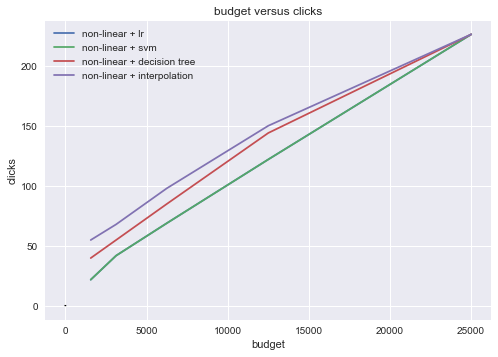

In [177]:
import seaborn as sns
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(budget_list, click_lr_n, label='non-linear + lr')
plt.plot(budget_list, click_svm, label='non-linear + svm')
plt.plot(budget_list, click_dt, label='non-linear + decision tree')
plt.plot(budget_list, click_int, label='non-linear + interpolation')
plt.xlabel('budget')
plt.ylabel('clicks')
plt.title('budget versus clicks')
plt.legend(loc='best')
plt.show()

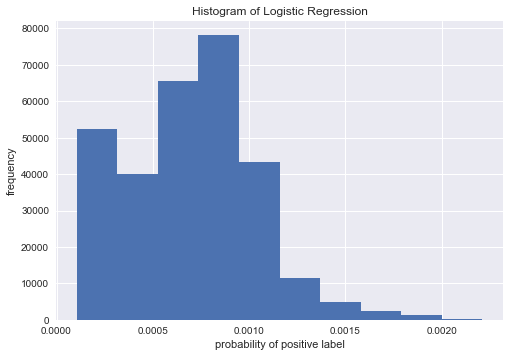

In [205]:

plt.hist(predicted_lr)

plt.ylabel('frequency')
plt.xlabel('probability of positive label')
plt.title('Histogram of Logistic Regression')
plt.show()

In [46]:
svm=CalibratedClassifierCV(sk.svm.SVC(kernel='rbf',C=12))
model=lg.fit(train_set,train_label)
predicted_svm= model.predict_proba(test_set)

In [47]:
predicted_svm=[el[1] for el in predicted_svm]

In [ ]:
predicted_0=model.predict(test_set)

In [ ]:
predicted= model.predict_proba(test_set)

In [ ]:
plt.hist(predicted1)

# Strategy Plots

In [ ]:
g_boosting=ensemble.GradientBoostingRegressor()

# Random Forest

In [6]:
import sklearn.ensemble as se
randam_f = se.RandomForestRegressor().fit(train_set,train_label)
predicted_randam_f = randam_f.predict(test_set)
#svm=CalibratedClassifierCV(sk.svm.SVC(kernel='rbf',C=12))

#knn=CalibratedClassifierCV(sk.neighbors.KNeighborsClassifier(n_neighbors=4))

#g_boosting=ensemble.GradientBoostingRegressor()

In [41]:
def non_lin(c,predict):
    lam= 5.2e-7
    bid_price = []
    for ctr in predict:
        #biding_p=c*((((ctr+np.sqrt(c**2*lam**2+ctr**2))/c*lam)**(1/3))-((c*lam/(ctr+np.sqrt(c**2*lam**2+ctr**2)))**(1/3)))
        b= c*(((ctr + np.sqrt(c**2 * lam**2 +ctr**2))/(c*lam))**(1/3)) - (((c*lam)/(ctr + np.sqrt(c**2 * lam**2 +ctr**2))) ** (1/3))
        bid_price.append(b)
    return bid_price

In [123]:
result_rf= []
for c in range(60,100,1):
    bid_price= non_lin(c,predicted_randam_f)
    re = validation_budget(bid_price,12500)
    result_rf.append(re)
    
clicks =[]
spend = []

for r in result_rf:
    clicks.append(r[4])
    spend.append(r[1])

In [210]:
b_result_rf=[]
for i in result_rf:
    if i[4]>225:
        b_result_rf.append(result_rf)

In [127]:
max(clicks)

164

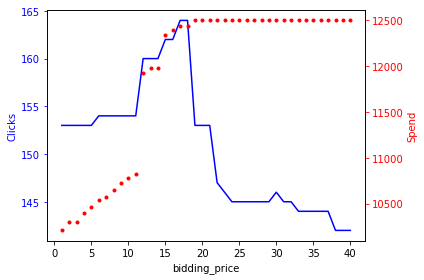

In [124]:

fig, ax1 = plt.subplots()
x = range(1,41,1)

ax1.plot(x, clicks, 'b-')
ax1.set_xlabel('bidding_price')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Clicks', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(x, spend, 'r.')
ax2.set_ylabel('Spend', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [37]:
max(clicks)

56

In [38]:
#RMSE random Forrest
sk.metrics.mean_squared_error(test_label,predicted_randam_f)

0.0098777643962114983

In [39]:
#AUC random Forrest
sk.metrics.roc_auc_score(test_label,predicted_randam_f)

0.68979426550752576

In [130]:
np.trapz(test_label,predicted_randam_f)

0.050000000000000086

In [134]:
!pip install ggplot

    100% |████████████████████████████████| 2.2MB 268kB/s ta 0:00:01


In [136]:
from ggplot import *
df11 = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df11, aes(x = 'fpr', ymin = 0, ymax = 'tpr')) + geom_line(aes(y = 'tpr')) + geom_area(alpha = 0.2) + ggtitle("ROC Curve w/ AUC = %s" % str(roc_auc)) 

TypeError: 'int' object is not iterable

In [140]:
len(fpr)

11

In [180]:
tpr,fpr,thr=sk.metrics.roc_curve(test_label, predicted_randam_f)

(array([ 0.        ,  0.00442478,  0.02212389,  0.03982301,  0.07964602,
         0.15044248,  0.23451327,  0.30088496,  0.37610619,  0.45575221,
         0.52212389,  1.        ]),
 array([  0.00000000e+00,   0.00000000e+00,   2.67091342e-05,
          3.67250595e-05,   8.34660443e-05,   1.50238880e-04,
          4.74087132e-04,   2.72767033e-03,   5.55683537e-02,
          1.41698634e-01,   2.07159383e-01,   1.00000000e+00]),
 array([ 2. ,  1. ,  0.9,  0.8,  0.7,  0.6,  0.5,  0.4,  0.3,  0.2,  0.1,
         0. ]))

In [193]:
sk.metrics.auc(fpr,tpr)

0.68979426550752576

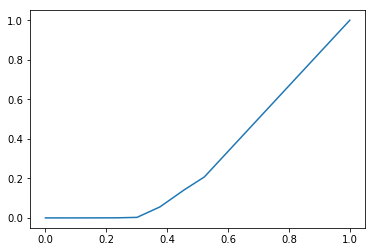

In [174]:
plt.plot(tpr,fpr)

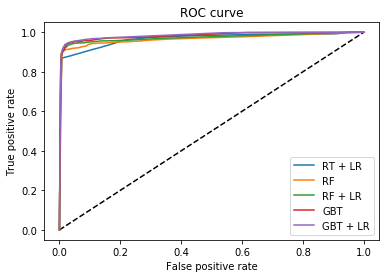

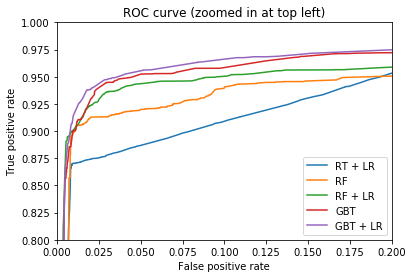

In [181]:
# Author: Tim Head <betatim@gmail.com>
#
# License: BSD 3 clause

import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

n_estimator = 10
X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)

# Unsupervised transformation based on totally random trees
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
    random_state=0)

rt_lm = LogisticRegression()
pipeline = make_pipeline(rt, rt_lm)
pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression()
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)


# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)


# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [186]:
a,b,c=roc_curve(y_test, y_pred_rt)

In [189]:
_

array([ 0.99912882,  0.99902385,  0.99895358, ...,  0.00410108,
        0.00409003,  0.00236873])

# Random

In [ ]:
g_boosting=ensemble.GradientBoostingRegressor(max_depth=6,learning_rate=0.001,n_estimators=500)

In [ ]:
import scipy 
#train_set=train_set.todense()
#test_set=test_set.todense()
boosting_model=g_boosting.fit(train_set,train_label)


In [ ]:
predicted_boosting = boosting_model.predict(test_set)

In [ ]:
result_svm= []
for c in range(100,180,1):
    bid_price= non_lin(c,predicted_boosting)
    re = validation_budget(bid_price,25000)
    result_svm.append(re)
    
clicks =[]
spend = []

for r in result_svm:
    clicks.append(r[4])
    spend.append(r[1])

In [ ]:

fig, ax1 = plt.subplots()
x = range(100,180,1)

ax1.plot(x, clicks, 'b-')
ax1.set_xlabel('bidding_price')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Clicks', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(x, spend, 'r.')
ax2.set_ylabel('Spend', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [ ]:
max(clicks)

In [ ]:
from sklearn import svm
svc = CalibratedClassifierCV(svm.LinearSVC(penalty='l2', C=0.3,class_weight='balanced')).fit(train_set, train_label)

predicted_svm = svc.predict_proba(test_set)
predicted1_svm=[el[1] for el in predicted_svm]

In [ ]:
plt.hist(predicted1_svm)

In [ ]:
cm = create_confusion_matrix(test_label,predicted_0)

In [ ]:
full_evaluation_table(cm)

### plt.hist(predicted)

In [ ]:
index_val.click.value_counts()

In [ ]:
import collections as c

def index_pre(a_list):
    userid_n = []
    userid_d = c.defaultdict()
    index = 1

    for user in a_list:
        if user in userid_d.keys():
            userid_n.append(userid_d[user])
        else:
            userid_d[user] = index
            userid_n.append(userid_d[user])
            index += 1
    return userid_n,userid_d

        

In [ ]:
tags= []
for usertag in train.usertag:
    for tag in usertag.split(','):
        if tag not in tags:
            tags.append(tag)
    

In [ ]:
L = []
for t in tags:
    s = 'L'+t
    L.append(s)

In [ ]:
for i,t in enumerate(tags):
    L[i]= []
    for string in train.usertag:
        if string.find(t) < 0:
            L[i].append(0)
        else:
            L[i].append(1)

In [ ]:
df= pd.DataFrame()
for i in range(0,69):
    se = pd.Series(L[i])
    df['tag'+str(i)] = se.values

In [9]:
# validation function

def validation(bidding):
    new= val.assign(bidding = bidding, diff= bidding -val['payprice'])
    new= new[new['diff'] >= 0]
    clicks =sum(new['click'])
    ctr= clicks/len(new)
    spend = sum(new['payprice'])/1000
    cpc = spend/clicks
    cpm = spend/len(new)
    return [ctr,spend,cpc,cpm,clicks]
    

In [8]:
def non_lin(c,predict):
    lam= 5.2e-7
    bid_price = []
    for ctr in predict:
        #biding_p=c*((((ctr+np.sqrt(c**2*lam**2+ctr**2))/c*lam)**(1/3))-((c*lam/(ctr+np.sqrt(c**2*lam**2+ctr**2)))**(1/3)))
        b= c*(((ctr + np.sqrt(c**2 * lam**2 +ctr**2))/(c*lam))**(1/3)) - (((c*lam)/(ctr + np.sqrt(c**2 * lam**2 +ctr**2))) ** (1/3))
        bid_price.append(b)
    return bid_price

In [10]:
result_svm= []
for c in range(1,100,1):
    bid_price= non_lin(c,predicted1_svm)
    re = validation_budget(bid_price,25000)
    result_svm.append(re)
    
clicks =[]
spend = []

for r in result_svm:
    clicks.append(r[4])
    spend.append(r[1])

NameError: name 'predicted1_svm' is not defined

In [ ]:

fig, ax1 = plt.subplots()
x = range(1,100,1)

ax1.plot(x, clicks, 'b-')
ax1.set_xlabel('bidding_price')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Clicks', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(x, spend, 'r.')
ax2.set_ylabel('Spend', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [ ]:
result= []
for c in range(25,100,1):
    bid_price= non_lin(c)
    re = validation(bid_price)
    result.append(re)
   

In [ ]:
clicks =[]
spend = []

for r in result:
    clicks.append(r[4])
    spend.append(r[1])

In [ ]:

fig, ax1 = plt.subplots()
x = range(25,100,1)

ax1.plot(x, clicks, 'b-')
ax1.set_xlabel('bidding_price')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Clicks', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(x, spend, 'r.')
ax2.set_ylabel('Spend', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [37]:
def validation_budget(bidding,budget):
    new= val.assign(bidding = bidding, diff= bidding -val['payprice'])
    new= new[new['diff'] >= 0]
    cost= 0
    index= 0
    for pay in new.payprice:
        cost= pay + cost
        index += 1
        if cost/1000 >= budget:
            break
        
    
    clicks =sum(new['click'][:index])
    ctr= clicks/index
    spend = sum(new['payprice'][:index])/1000
    cpc = spend/clicks
    cpm = spend/index
    return [ctr,spend,cpc,cpm,clicks]
    

In [ ]:
bid_price= non_lin(60)
re = validation_budget(bid_price,25000)

In [ ]:
b

In [ ]:
re

In [ ]:
result= []
for c in range(1,100,1):
    bid_price= non_lin(c)
    re = validation_budget(bid_price,25000)
    result.append(re)
    
clicks =[]
spend = []

for r in result:
    clicks.append(r[4])
    spend.append(r[1])

In [ ]:

fig, ax1 = plt.subplots()
x = range(1,100,1)

ax1.plot(x, clicks, 'b-')
ax1.set_xlabel('bidding_price')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Clicks', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(x, spend, 'r.')
ax2.set_ylabel('Spend', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [ ]:
result

# Constant

In [ ]:
# performance of 6 moments

min_ctr=validation([2.270000e+02] * len(val))
print(min_ctr)
first_q_ctr = validation([2.410000e+02] * len(val))
print(first_q_ctr)
median_ctr = validation([2.940000e+02] * len(val))
print(median_ctr)
mean_ctr = validation([2.724582e+02] * len(val))
print(mean_ctr)
third_q_ctr = validation([3.000000e+02] * len(val))
print(third_q_ctr)
max_ctr = validation([3.000000e+02] * len(val))
print(max_ctr)


# Constant

In [105]:
constants= []
constants.append(validation_budget(250,12500*2))  
    

In [106]:
clicks=[]
for r in constants:
    clicks.append(r[4])

In [107]:
max(clicks)

216

In [ ]:
ctr=[]
spend=[]
for constant in constants:
    ctr.append(constant[0])
    spend.append(constant[1])
    

In [ ]:
#plt.plot(range(227,300,1),ctr,'bs', range(227,300,1), spend, 'g^')



fig, ax1 = plt.subplots()
x = range(227,300,1)

ax1.plot(x, ctr, 'b-')
ax1.set_xlabel('bidding_price')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('CTR', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(x, spend, 'r.')
ax2.set_ylabel('Spend', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [ ]:
plt.hist(ctr)

# Random

In [65]:
import random

random_list= []

for i in range(0,100):
    random_list.append([random.choice(range(250,270,1)) for _ in range(len(val))])
  

In [70]:
output_random =[]
for ran in random_list:
    output_random.append(validation_budget(ran,12500))

In [72]:
clicks=[]
for r in output_random:
    clicks.append(r[4])

In [73]:
max(clicks)

127

In [42]:
ctr_random=[]
spend_random=[]
for out in output_random:
    ctr_random.append(out[0])
    spend_random.append(out[1])

(array([  4.,   0.,  21.,   0.,  21.,  17.,   0.,  28.,   0.,   9.]),
 array([ 0.000735  ,  0.00073637,  0.00073773,  0.00073909,  0.00074046,
         0.00074182,  0.00074318,  0.00074455,  0.00074591,  0.00074727,
         0.00074863]),
 <a list of 10 Patch objects>)

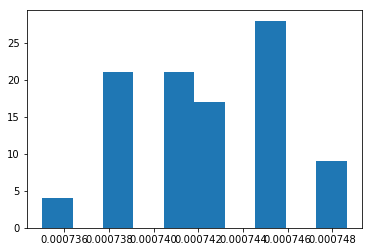

In [43]:
plt.hist(ctr_random)

In [4]:
plt.hist(spend_random)

NameError: name 'spend_random' is not defined